In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./img/fish.jpg')
rows, cols = img.shape[:2]  # 영상의 크기
dx, dy = 100, 50            # 이동할 픽셀 거리

In [4]:
# 변환 행렬 생성
mtrx = np.float32([[1, 0, dx], [0, 1, dy]])

In [5]:
# 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))

# 탈락된 외곽 픽셀을 파란색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, 
                     cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255, 0, 0))

# 탈락된 외곽 픽셀을 원본을 반사시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None,
                     cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

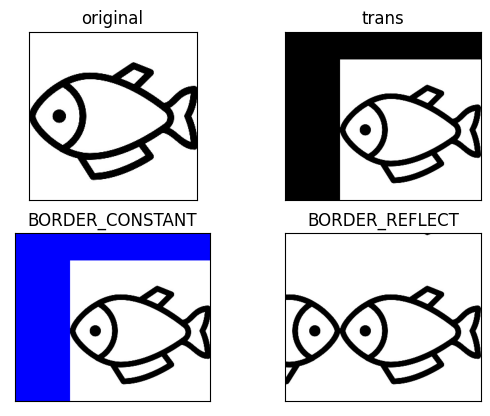

In [10]:
imgs = {'original':img, 'trans':dst, 'BORDER_CONSTANT':dst2, 'BORDER_REFLECT':dst3}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()